In [1]:
import numpy as np
import matplotlib.pyplot as plt

import codecs
import re
import os.path

import re
import unicodedata
import string
from nltk.corpus import stopwords

from wordcloud import WordCloud

from collections import Counter

from sklearn.feature_extraction import text 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import numpy as np
import sklearn.naive_bayes as nb
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

#### Functions load files

In [2]:
# Chargement des données:
def load_pres(fname):
    alltxts = []
    alllabs = []
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    while True:
        txt = s.readline()
        if(len(txt))<5:
            break
        #
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt)
        txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)
        if lab.count('M') >0:
            alllabs.append(-1)
        else: 
            alllabs.append(1)
        alltxts.append(txt)
    return alltxts,alllabs

In [3]:
def load_pres_test(fname):
    alltxts = []
    alllabs = []
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    while True:
        txt = s.readline()
        if(len(txt))<5:
            break
        #
        lab = re.sub(r"<[0-9]*:[0-9]*(.)>*","\\1",txt)
        txt = re.sub(r"<[0-9]*:[0-9]*()>*","\\1",txt)
        if lab.count('M') >0:
            alllabs.append(-1)
        else: 
            alllabs.append(1)
        alltxts.append(txt)
    return alltxts,alllabs

In [4]:
def load_movies(path2data): # 1 classe par répertoire
    alltxts = [] # init vide
    labs = []
    cpt = 0
    for cl in os.listdir(path2data): # parcours des fichiers d'un répertoire
        for f in os.listdir(path2data+cl):
            txt = open(path2data+cl+'/'+f).read()
            alltxts.append(txt)
            labs.append(cpt)
        cpt+=1 # chg répertoire = cht classe
        
    return alltxts,labs

#### Init and show files

In [5]:
#fname = "./AFDpresidentutf8/corpus.tache1.learn.utf8"

#X_presidents,Y_presidents = load_pres(fname)

In [6]:
#fname = "./AFDpresidentutf8/corpus.tache1.test.utf8"

#X_test_presidents,_ = load_pres_test(fname)

In [7]:
#print(len(X_presidents),len(Y_presidents))
#print(X_presidents[0])
#print(Y_presidents[0])
#print(X_presidents[-1])
#print(Y_presidents[-1])

In [8]:
#print(len(X_test_presidents))
#print(X_test_presidents[0])
#print(X_test_presidents[-1])

In [9]:
path = "./movies1000/"

X_movies,y_movies = load_movies(path)

In [10]:
path = "./testSentiment.txt"
f = open(path,encoding="utf8")
X_test_sentiments = np.array(f.readlines())

In [ ]:
print(len(X_movies),len(y_movies))
print(X_movies[0])
print(y_movies[0])
print("\n#######################################\n\n")
print(X_movies[-1])
print(y_movies[-1])

In [ ]:
print(len(X_test_sentiments))
print(X_test_sentiments[0])
print("\n")
print(X_test_sentiments[-1])

In [11]:
vectorizer = CountVectorizer()
X_transform_movies = vectorizer.fit_transform(X_movies)
mots_uniques = vectorizer.get_feature_names()
print('Nombre de mots uniques =>',len(vectorizer.get_feature_names()))

Nombre de mots uniques => 39659


# Analyse

In [12]:
nb_occurs = np.sum(X_transform_movies.toarray(), axis=0)
counter = Counter( { mots_uniques[i] : nb_occurs[i] for i in range(len(mots_uniques)) } )
counter.most_common(100)

[('the', 76529),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ('is', 25195),
 ('in', 21822),
 ('it', 16107),
 ('that', 15924),
 ('as', 11378),
 ('with', 10792),
 ('for', 9961),
 ('his', 9587),
 ('this', 9578),
 ('film', 9517),
 ('he', 8864),
 ('but', 8634),
 ('on', 7385),
 ('are', 6949),
 ('by', 6261),
 ('be', 6174),
 ('one', 5852),
 ('movie', 5771),
 ('an', 5744),
 ('who', 5692),
 ('not', 5577),
 ('you', 5316),
 ('from', 4999),
 ('at', 4986),
 ('was', 4940),
 ('have', 4901),
 ('they', 4825),
 ('has', 4719),
 ('her', 4522),
 ('all', 4373),
 ('there', 3770),
 ('like', 3690),
 ('so', 3683),
 ('out', 3637),
 ('about', 3523),
 ('up', 3405),
 ('more', 3347),
 ('what', 3322),
 ('when', 3258),
 ('which', 3161),
 ('or', 3148),
 ('she', 3141),
 ('their', 3122),
 ('some', 2985),
 ('just', 2905),
 ('can', 2882),
 ('if', 2799),
 ('we', 2775),
 ('him', 2633),
 ('into', 2623),
 ('even', 2565),
 ('only', 2495),
 ('than', 2474),
 ('no', 2472),
 ('good', 2411),
 ('time', 2411),
 ('most', 2306),
 (

On constate directement que les mots les plus presents sont des stopwords, nous allons voir plus tard s'il est mieux de les enlever.

Essayons de voir a quoi ressemble les donnees positives et negatives separement

In [13]:
movies_pos = []
movies_neg = []
for i in range(len(y_movies)):
    if y_movies[i] == 1:
        movies_pos.append(X_movies[i])
    else:
        movies_neg.append(X_movies[i])

### Movies Positives

In [14]:
txt_pos = ' '.join(movies_pos)

In [15]:
wordcloud_pos = WordCloud(background_color = 'white').generate(txt_pos)

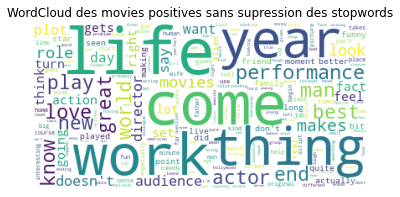

In [58]:
plt.figure()
plt.title("WordCloud des movies positives sans supression des stopwords")
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.savefig('fig1.png')
plt.show();

### Movies Negatives

In [17]:
txt_neg = ' '.join(movies_neg)

In [18]:
wordcloud_neg = WordCloud(background_color = 'black').generate(txt_neg)

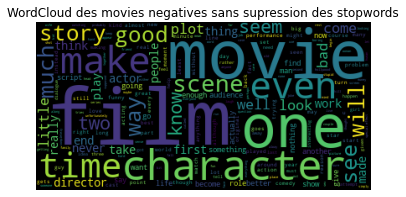

In [19]:
plt.figure()
plt.title("WordCloud des movies negatives sans supression des stopwords")
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.show();

On s'apercoit ici que dans les deux cas les mots les plus frequents sont similaires.
Il s'agit en plus de mot relatif au vocabulaire du cinema et non en rapport avec le sentiments de l'utilisateur

Mais aussi, on voit clairement les stopwords sont bien trop presents, via le most_common sur tout le dataset.

Essayons de voir ce qui se passe si nous enlevons les 20 mots communs les plus recurrents

### Supression des stopwords et des mots en communs (20 plus recurrents)

In [20]:
movies_posSW = []
movies_negSW = []
for i in range(len(y_movies)):
    if y_movies[i] == 1:
        movies_posSW.append(X_movies[i])
    else:
        movies_negSW.append(X_movies[i])

#### Movies Positives

In [21]:
vectorizerPos = CountVectorizer(stop_words='english')
transform_movies_pos = vectorizerPos.fit_transform(movies_pos)
mots_uniques_pos = vectorizerPos.get_feature_names()
print('Nombre de mots uniques pos =>',len(vectorizerPos.get_feature_names()))

Nombre de mots uniques pos => 30021


In [22]:
nb_occurs_pos = np.sum(transform_movies_pos.toarray(), axis=0)
counterPos = Counter( { mots_uniques_pos[i] : nb_occurs_pos[i] for i in range(len(mots_uniques_pos)) } )
counterPos.most_common(50)

[('film', 5230),
 ('movie', 2525),
 ('like', 1802),
 ('just', 1342),
 ('good', 1248),
 ('story', 1246),
 ('time', 1243),
 ('character', 1078),
 ('life', 1057),
 ('characters', 986),
 ('way', 929),
 ('films', 884),
 ('does', 866),
 ('best', 829),
 ('make', 791),
 ('people', 789),
 ('really', 777),
 ('little', 775),
 ('man', 764),
 ('great', 751),
 ('scene', 727),
 ('new', 723),
 ('world', 665),
 ('love', 661),
 ('scenes', 638),
 ('movies', 635),
 ('doesn', 602),
 ('plot', 596),
 ('director', 586),
 ('don', 576),
 ('know', 572),
 ('makes', 561),
 ('performance', 549),
 ('seen', 541),
 ('end', 531),
 ('action', 520),
 ('work', 520),
 ('role', 488),
 ('years', 488),
 ('real', 485),
 ('year', 485),
 ('big', 467),
 ('old', 463),
 ('right', 454),
 ('things', 451),
 ('john', 448),
 ('audience', 444),
 ('star', 444),
 ('young', 439),
 ('family', 434)]

#### Movies Negatives

In [23]:
vectorizerNeg = CountVectorizer(stop_words='english')
transform_movies_neg = vectorizerNeg.fit_transform(movies_neg)
mots_uniques_neg = vectorizerNeg.get_feature_names()
print('Nombre de mots uniques neg =>',len(vectorizerNeg.get_feature_names()))

Nombre de mots uniques neg => 28084


In [24]:
nb_occurs_neg = np.sum(transform_movies_neg.toarray(), axis=0)
counterNeg = Counter( { mots_uniques_neg[i] : nb_occurs_neg[i] for i in range(len(mots_uniques_neg)) } )
counterNeg.most_common(50)

[('film', 4287),
 ('movie', 3246),
 ('like', 1888),
 ('just', 1563),
 ('time', 1168),
 ('good', 1163),
 ('bad', 1034),
 ('character', 942),
 ('story', 923),
 ('plot', 917),
 ('characters', 873),
 ('make', 851),
 ('really', 781),
 ('way', 764),
 ('little', 726),
 ('don', 718),
 ('does', 702),
 ('doesn', 675),
 ('scene', 670),
 ('people', 666),
 ('action', 652),
 ('films', 652),
 ('director', 651),
 ('know', 645),
 ('scenes', 636),
 ('man', 632),
 ('big', 597),
 ('movies', 571),
 ('new', 569),
 ('better', 531),
 ('end', 531),
 ('life', 529),
 ('best', 504),
 ('work', 500),
 ('isn', 491),
 ('script', 478),
 ('audience', 470),
 ('going', 470),
 ('think', 459),
 ('love', 458),
 ('funny', 451),
 ('thing', 448),
 ('gets', 442),
 ('actually', 439),
 ('look', 437),
 ('makes', 431),
 ('comedy', 430),
 ('real', 430),
 ('did', 422),
 ('long', 415)]

In [25]:
def remove_same(nb_remove,t1,t2):
    """
    Renvoie la liste des mots en communs entre t1 et t2, dans le vocabulaire de leur nb_remove plus recurrents.
    """
    t1_values = []
    t2_values = []
    for i in t1.most_common(nb_remove):
         t1_values.append(i[0])
    for i in t2.most_common(nb_remove):
         t2_values.append(i[0])
            
    common = list(set(t1_values).intersection(t2_values))
    return common
    #text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [40]:
removeWords = remove_same(25,counterPos,counterNeg)

In [41]:
removeWords

['just',
 'films',
 'like',
 'people',
 'does',
 'time',
 'film',
 'characters',
 'way',
 'little',
 'really',
 'scenes',
 'movie',
 'character',
 'scene',
 'make',
 'story',
 'good']

In [42]:
stopsWordsUP = text.ENGLISH_STOP_WORDS.union(removeWords)

In [43]:
wordcloud_pos = WordCloud(background_color = 'white', stopwords=stopsWordsUP).generate(txt_pos)

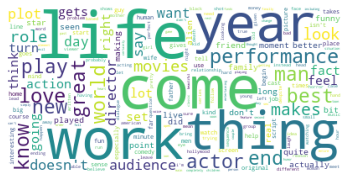

In [44]:
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.show();

In [45]:
wordcloud_neg = WordCloud(background_color = 'black', stopwords=stopsWordsUP).generate(txt_neg)

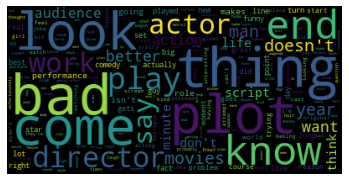

In [46]:
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.show();

Ici on voit qu'on a une representation des mots qui est plus representative des classes surtout pour les negatives

Les majuscules ne sont pas necessaires car certes de maniere generale on peut penser que les personnes mecontentent s'exprimer avec des mots forts et donc en MAJUSCULES. Sauf qu'ici c'est surtout la recherche des termes negatives et positives qui nous interesse donc le fait d'avoir le memes mot en minuscule ou maj n'a pas d'interet. C'est le sens des mots et leur signification et non leur syntaxe qui va nous aider a determiner le sentiment.

Un aspect qui pour le coup peut etre interessant c'est la lemmanisation surtout pour la negation car avec du bi-grammes on aura le <'t> qui pourra surement donc nous aider a realiser une meilleure prediction.

La racinisation n'est clairement pas une bonne idee car celui-ci va donc mettre les mots a leurs forme initiales donc nous n'allons plus avoir la forme negative des mots, ce qui va donc empecher de distinguer les deux classes.

#### Function to transform the text

In [47]:
def transform(text, punc=False,accentMaj=False,nb=False, stopW=False) :
    text_transf = text
    
    for i in range(len(text)) :
        
        if punc:
            punc = string.punctuation  # recupération de la ponctuation
            punc += '\n\r\t'
            text_transf[i] = text_transf[i].translate(str.maketrans(punc, ' ' * len(punc)))  
        if accentMaj:
            # suppression des accents et des caractères non normalisés
            text_transf[i] = unicodedata.normalize('NFD', text_transf[i]).encode('ascii', 'ignore').decode("utf-8")
            text_transf[i] = text_transf[i].lower()
        
        if nb:
            # suppression des nombres
            text_transf[i] = re.sub('[0-9]+', '', text_transf[i]) # remplacer une séquence de chiffres par rien
        if stopW:
            for w in stopwords.words('english'):
                text_transf[i] = text_transf[i].replace(w, '') 
    return text_transf

#### All Vectorizer for all models

On va donc tester les modeles avec differentes transformation :
    <ul>
    <li>avec/sans stopWordUP</li>
    <li>1-gram car on a l'apostrophe qui est la plupart du temps present dans des mots negatives et de maniere generale le 1-gram marche bien comme dans la traduction donc a tester</li>
    <li>3-gram permettant la de peut-etre mettre en evidence les n't</li>
    </li>

In [48]:
vectorizerC_movies = CountVectorizer(max_features=10000)
vectorizerC_moviesSW = CountVectorizer(max_features=10000, stop_words=stopsWordsUP)
vectorizerC_movies1G = CountVectorizer(max_features=10000, ngram_range=(1,1))
vectorizerC_moviesSW1G = CountVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,1))
vectorizerC_movies2G = CountVectorizer(max_features=10000, ngram_range=(2,2))
vectorizerC_moviesSW2G = CountVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(2,2))

vectorizerTFIDF_movies = TfidfVectorizer(max_features=10000)
vectorizerTFIDF_moviesSW = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP)
vectorizerTFIDF_movies1G = TfidfVectorizer(max_features=10000, ngram_range=(1,1))
vectorizerTFIDF_moviesSW1G = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,1))
vectorizerTFIDF_movies2G = TfidfVectorizer(max_features=10000, ngram_range=(2,2))
vectorizerTFIDF_moviesSW2G = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(2,2))

In [49]:
vectorizers = {'vectorizerC_movies' : vectorizerC_movies, 'vectorizerC_moviesSW' : vectorizerC_moviesSW,
               'vectorizerC_movies1G' : vectorizerC_movies1G, 'vectorizerC_moviesSW1G' : vectorizerC_moviesSW1G,
               'vectorizerC_movies2G' : vectorizerC_movies2G, 'vectorizerC_moviesSW2G' : vectorizerC_moviesSW2G,
               'vectorizerTFIDF_movies' : vectorizerTFIDF_movies, 'vectorizerTFIDF_moviesSW' : vectorizerTFIDF_moviesSW,
               'vectorizerTFIDF_movies1G' : vectorizerTFIDF_movies1G, 'vectorizerTFIDF_moviesSW1G' : vectorizerTFIDF_moviesSW1G,
               'vectorizerTFIDF_movies2G' : vectorizerTFIDF_movies2G, 'vectorizerTFIDF_moviesSW2G' : vectorizerTFIDF_moviesSW2G}

#### Models and their parameters

In [50]:
clf = nb.MultinomialNB()
svc = svm.LinearSVC()
lin = linear_model.LogisticRegression()

param_grid_clf = {'alpha': [0.1,0.2,0.5,0.8,1]}
param_grid_svc = {'max_iter':[10000,15000,20000,25000], 'C': [0,5,10,15,20,25,30,35,40,45,50]}
param_grid_lin = {'max_iter':[3000,5000,5000,10000,20000,25000]}

In [51]:
all_models = {clf:param_grid_clf, svc:param_grid_svc, lin:param_grid_lin}

#### Params for the Grid Search

In [52]:
accuracys = {}

for v in vectorizers:
    accuracys[v] = []

In [53]:
accuracys

{'vectorizerC_movies': [],
 'vectorizerC_moviesSW': [],
 'vectorizerC_movies1G': [],
 'vectorizerC_moviesSW1G': [],
 'vectorizerC_movies2G': [],
 'vectorizerC_moviesSW2G': [],
 'vectorizerTFIDF_movies': [],
 'vectorizerTFIDF_moviesSW': [],
 'vectorizerTFIDF_movies1G': [],
 'vectorizerTFIDF_moviesSW1G': [],
 'vectorizerTFIDF_movies2G': [],
 'vectorizerTFIDF_moviesSW2G': []}

In [55]:
X_movies_transform = transform(X_movies, punc=True, accentMaj=False, nb=True)

In [56]:
for vname in vectorizers:
    v = vectorizers[vname]
    
    print("Work on vectorizer => ",vname)
    vec_movies_train = v.fit_transform(X_movies_transform)
    for m in all_models:
        print("\tWith => ",m)
        grid_cv = GridSearchCV(m, all_models[m], n_jobs=-1, cv=5)
        grid_cv.fit(vec_movies_train, y_movies)
        #print('Best score for', m, " => ", grid_cv.best_score_)
        #print('The parameters =>', grid_cv.best_params_)
        accuracys[vname].append((grid_cv.best_score_, grid_cv.best_params_))

Work on vectorizer =>  vectorizerC_movies
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [  nan   nan   nan   nan 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827
 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827
 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827
 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827]
  warnings.warn(


	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_moviesSW
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan    nan 0.8295 0.8295 0.8295 0.8295 0.83   0.83
 0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83
 0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83
 0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83
 0.83   0.83   0.83   0.83  ]
  warnings.warn(


	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_movies1G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [  nan   nan   nan   nan 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827
 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827
 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827
 0.827 0.827 0.827 0.827 0.827 0.827 0.827 0.827]
  warnings.warn(


	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_moviesSW1G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan    nan 0.8295 0.8295 0.8295 0.8295 0.83   0.83
 0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83
 0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83
 0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83   0.83
 0.83   0.83   0.83   0.83  ]
  warnings.warn(


	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_movies2G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan    nan 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915
 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915
 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915
 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915 0.7915
 0.7915 0.7915 0.7915 0.7915]
  warnings.warn(


	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_moviesSW2G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan    nan 0.714  0.714  0.714  0.714  0.7135 0.7135
 0.7135 0.7135 0.713  0.713  0.713  0.713  0.713  0.713  0.713  0.713
 0.713  0.713  0.713  0.713  0.713  0.713  0.713  0.713  0.713  0.713
 0.713  0.713  0.713  0.713  0.713  0.713  0.713  0.713  0.713  0.713
 0.713  0.713  0.713  0.713 ]
  warnings.warn(


	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_movies
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan    nan 0.853  0.853  0.853  0.853  0.851  0.851
 0.851  0.851  0.851  0.851  0.851  0.851  0.8485 0.8485 0.8485 0.8485
 0.849  0.849  0.849  0.849  0.8495 0.8495 0.8495 0.8495 0.85   0.85
 0.85   0.85   0.8505 0.8505 0.8505 0.8505 0.8505 0.8505 0.8505 0.8505
 0.85   0.85   0.85   0.85  ]
  warnings.warn(


	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_moviesSW
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan    nan 0.8415 0.8415 0.8415 0.8415 0.8375 0.8375
 0.8375 0.8375 0.8375 0.8375 0.8375 0.8375 0.8365 0.8365 0.8365 0.8365
 0.836  0.836  0.836  0.836  0.8355 0.8355 0.8355 0.8355 0.835  0.835
 0.835  0.835  0.835  0.835  0.835  0.835  0.835  0.835  0.835  0.835
 0.8355 0.8355 0.8355 0.8355]
  warnings.warn(


	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_movies1G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan    nan 0.853  0.853  0.853  0.853  0.851  0.851
 0.851  0.851  0.851  0.851  0.851  0.851  0.8485 0.8485 0.8485 0.8485
 0.849  0.849  0.849  0.849  0.8495 0.8495 0.8495 0.8495 0.85   0.85
 0.85   0.85   0.8505 0.8505 0.8505 0.8505 0.8505 0.8505 0.8505 0.8505
 0.85   0.85   0.85   0.85  ]
  warnings.warn(


	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_moviesSW1G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan    nan 0.8415 0.8415 0.8415 0.8415 0.8375 0.8375
 0.8375 0.8375 0.8375 0.8375 0.8375 0.8375 0.8365 0.8365 0.8365 0.8365
 0.836  0.836  0.836  0.836  0.8355 0.8355 0.8355 0.8355 0.835  0.835
 0.835  0.835  0.835  0.835  0.835  0.835  0.835  0.835  0.835  0.835
 0.8355 0.8355 0.8355 0.8355]
  warnings.warn(


	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_movies2G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan    nan 0.8185 0.8185 0.8185 0.8185 0.815  0.815
 0.815  0.815  0.816  0.816  0.816  0.816  0.8155 0.8155 0.8155 0.8155
 0.815  0.815  0.815  0.815  0.8145 0.8145 0.8145 0.8145 0.815  0.815
 0.815  0.815  0.815  0.815  0.815  0.815  0.815  0.815  0.815  0.815
 0.815  0.815  0.815  0.815 ]
  warnings.warn(


	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_moviesSW2G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [   nan    nan    nan    nan 0.731  0.731  0.731  0.731  0.729  0.729
 0.729  0.729  0.729  0.729  0.729  0.729  0.7285 0.7285 0.7285 0.7285
 0.728  0.728  0.728  0.728  0.728  0.728  0.728  0.728  0.7275 0.7275
 0.7275 0.7275 0.7265 0.7265 0.7265 0.7265 0.7265 0.7265 0.7265 0.7265
 0.7265 0.7265 0.7265 0.7265]
  warnings.warn(


	With =>  LogisticRegression()


In [ ]:
accuracys

### Train avec tout le dataset

In [ ]:
vec_movies = vectorizerTFIDF_movies1G.fit_transform(X_movies_transform)

In [ ]:
svcPredict = svm.LinearSVC(max_iter=10000, C=5)

In [ ]:
svcPredict.fit(vec_movies, y_movies)

In [ ]:
path = "./testSentiment.txt"
f = open(path,encoding="utf8")
sentiments_tests = np.array(f.readlines())

In [ ]:
transform_sentiments_test = transform(sentiments_tests,punc=True,accentMaj=True,nb=True)

In [ ]:
vec_sentiments_test = vectorizerTFIDF_movies1G.fit_transform(transform_sentiments_test)

In [ ]:
predicts = svcPredict.predict(vec_sentiments_test)

In [ ]:
with open('./predictSentiments.txt', 'w') as f:
    for p in predicts:
        f.write(str(p)+'\n')

In [ ]:
##################################################################

In [ ]:
#path =  "./movies1000/"
#alltxts,alllabs = load_movies(path)
#X = np.array(alltxts)
#Y = np.array(alllabs)

#X_final_vector = vectorizer_movies.fit_transform(X)
#svcPredict.fit(X_final_vector, Y)

#path = "./testSentiment.txt"
#f = open(path,encoding="utf8")
#X_test_final = np.array(f.readlines())
#X_test_vector = vectorizer_movies.transform(X_test_final)
#final_pred_svc = svcPredict.predict(X_test_vector)

In [ ]:
predTrue = []
with open('./message.txt', 'r') as f:
    lines = lines = [line.rstrip('\n') for line in f]
    for l in lines:
        predTrue.append(int(l))